In [2]:
import os

In [6]:
os.chdir('/Users/jrmotta/Documents/Data Science')
os.getcwd()

'/Users/jrmotta/Documents/Data Science'

In [10]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib as mpl
import matplotlib.pyplot as plt

# Let's read in the data file
rawd = pd.read_excel('/Users/jrmotta/Documents/Data Science/DADE_SchoolGrades17.xls', header = None)
rawd = rawd[4:]
rawd.columns = rawd.iloc[0]
rawd = rawd[1:]

# We have seen this data set before in notebook 5.3-MDCPS-Grades-2017.ipynb

In [11]:
df2 = pd.DataFrame(rawd, columns = ['District Number', 'District Name', 'School Number', 'School Name',
       'English Language Arts Achievement',
       'English Language Arts Learning Gains',
       'English Language Arts Learning Gains of the Lowest 25%',
       'Mathematics Achievement', 'Mathematics Learning Gains',
       'Mathematics Learning Gains of the Lowest 25%', 'Science Achievement',
       'Social Studies Achievement', 'Middle School Acceleration',
       'Graduation Rate 2015-16', 'College and Career Acceleration 2015-16',
       'Total Points Earned', 'Total Components',
       'Percent of Total Possible Points', 'Percent Tested', 'Grade 2017',
       'Grade 2016', 'Informational Baseline Grade 2015', 'Grade 2014',
       'Grade 2013', 'Grade 2012', 'Grade 2011', 'Grade 2010', 'Grade 2009',
       'Grade 2008', 'Grade 2007', 'Grade 2006', 'Grade 2005', 'Grade 2004',
       'Grade 2003', 'Grade 2002', 'Grade 2001', 'Grade 2000', 'Grade 1999',
       'Was the collocated rule used?', 'Collocated Number', 'Charter School',
       'Title I', 'Alternative/ESE Center School', 'School Type',
       'Percent of Minority Students',
       'Percent of Economically Disadvantaged Students', 'Region'])
df2.head()

,District Number,District Name,School Number,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,...,Grade 1999,Was the collocated rule used?,Collocated Number,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,Region
5,13,DADE,0041,AIR BASE K-8 CENTER FOR INTERNATIONAL EDUCATION,86,68,66,87,70,69,...,C,N,NaN,NO,NO,N,04,89.5,62.3,3
6,13,DADE,0070,CORAL REEF MONTESSORI ACADEMY CHARTER,75,61,57,63,67,58,...,NaN,N,NaN,YES,NO,N,04,79.9,19.2,3
7,13,DADE,0071,EUGENIA B. THOMAS K-8 CENTER,67,63,60,65,60,44,...,NaN,N,NaN,NO,NO,N,04,95.4,44.8,3
8,13,DADE,0072,SUMMERVILLE ADVANTAGE ACADEMY,51,56,48,60,66,55,...,NaN,N,NaN,YES,YES,N,01,94.4,79.0,3
9,13,DADE,0073,MANDARIN LAKES K-8 ACADEMY,32,49,44,37,48,38,...,NaN,N,NaN,NO,YES,N,04,96.7,97.3,3


In [12]:
# for examples of describe(), see 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df2.describe()

,District Number,District Name,School Number,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,...,Grade 1999,Was the collocated rule used?,Collocated Number,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,Region
count,440,440,440,440,434,434,424,434,434,424,...,270,440,2,440,440,440,440,440,440,440
unique,1,1,440,440,80,52,65,78,64,67,...,5,2,1,2,2,2,4,149,302,1
top,13,DADE,0041,AIR BASE K-8 CENTER FOR INTERNATIONAL EDUCATION,60,62,57,71,65,48,...,D,N,131070136611,NO,YES,N,01,99.0,96.8,3
freq,440,440,1,1,14,22,17,15,18,19,...,126,438,2,324,293,439,204,15,5,440


In [14]:
df = df2[['English Language Arts Achievement', 'Social Studies Achievement', 
          'Mathematics Achievement', 'Science Achievement']].copy()
df = df.dropna(axis=0)
df.describe()
len(df)

224

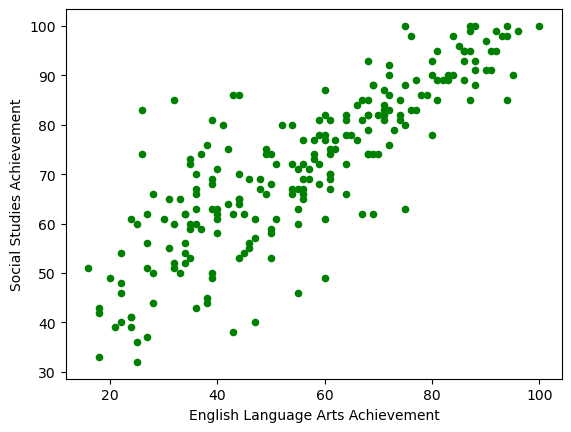

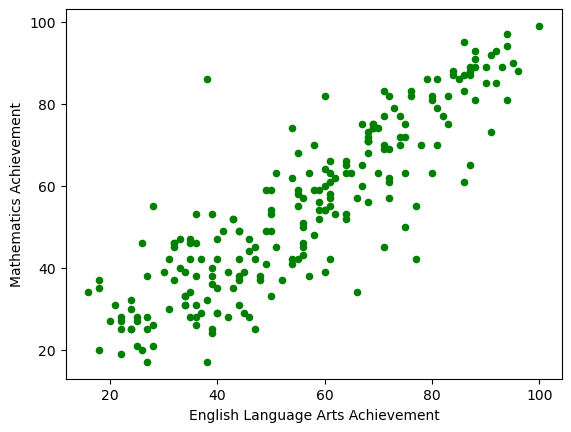

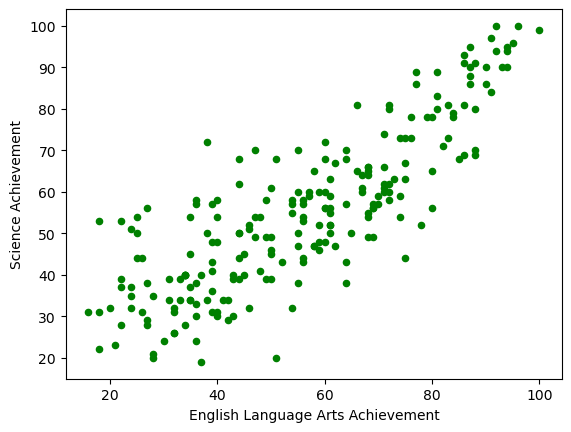

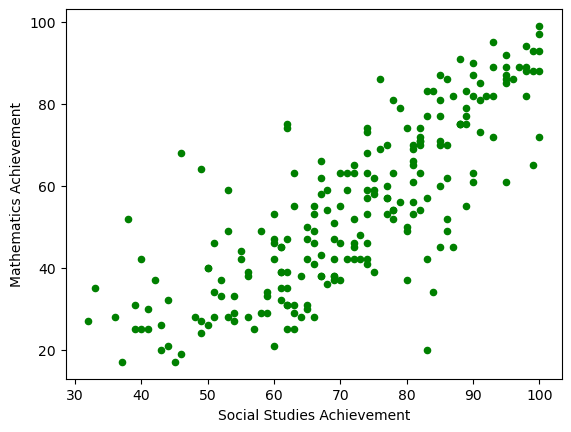

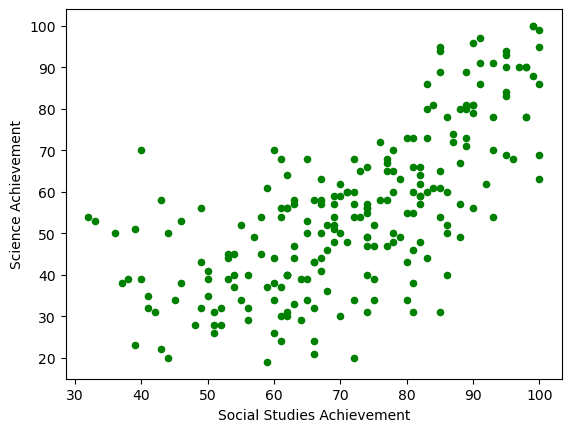

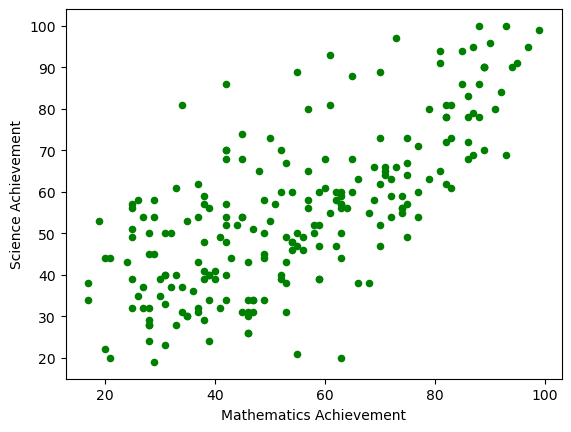

In [15]:
df.plot.scatter(x='English Language Arts Achievement', y='Social Studies Achievement', c='green')
df.plot.scatter(x='English Language Arts Achievement', y='Mathematics Achievement', c='green')
df.plot.scatter(x='English Language Arts Achievement', y='Science Achievement', c='green')
df.plot.scatter(x='Social Studies Achievement', y='Mathematics Achievement', c='green')
df.plot.scatter(x='Social Studies Achievement', y='Science Achievement', c='green')
df.plot.scatter(x='Mathematics Achievement', y='Science Achievement', c='green')

plt.show()

In [16]:
df

,English Language Arts Achievement,Social Studies Achievement,Mathematics Achievement,Science Achievement
5,86,95,87,69
6,75,63,63,44
7,67,81,65,60
9,32,52,37,32
11,68,82,71,64
...,...,...,...,...
440,49,66,49,58
441,54,67,62,58
442,54,72,42,57
443,25,60,21,44


# Below you can see how to restrict the analysis to parts of the dataframe

In [17]:
df.iloc[[2,3,4,9]]

,English Language Arts Achievement,Social Studies Achievement,Mathematics Achievement,Science Achievement
7,67,81,65,60
9,32,52,37,32
11,68,82,71,64
31,71,84,83,61


In [18]:
df.iloc[[2,3,4,9]]['Science Achievement']

7     60
9     32
11    64
31    61
Name: Science Achievement, dtype: object

# Practical Guide to Clustering 
## https://realpython.com/k-means-clustering-python/

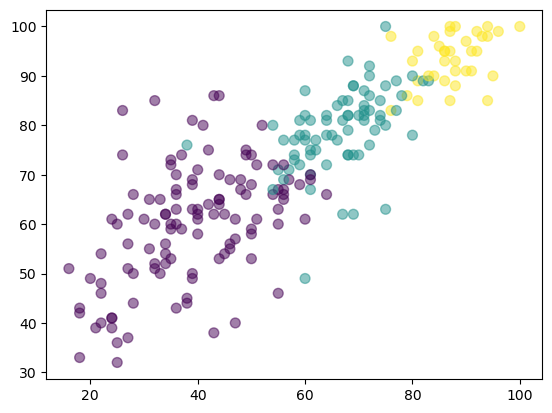

In [19]:
from sklearn.cluster import AgglomerativeClustering
# from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
# pd.to_numeric(df['English Language Arts Achievement'])
yhat = model.fit_predict(df)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

plt.scatter(df['English Language Arts Achievement'], df['Social Studies Achievement'], 
            c=model.labels_.astype(float), s=50, alpha=0.5)
plt.show()

[[0.53545264 0.63736264 0.50589654 0.45950346]
 [0.81433637 0.88454318 0.80150493 0.77935382]
 [0.22286822 0.35943912 0.22078843 0.25021533]]


/Users/jrmotta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


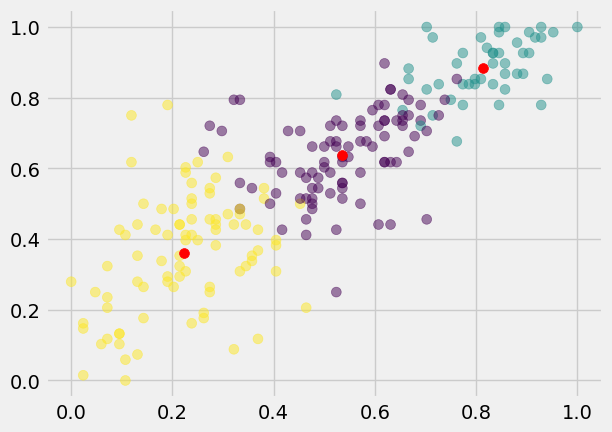

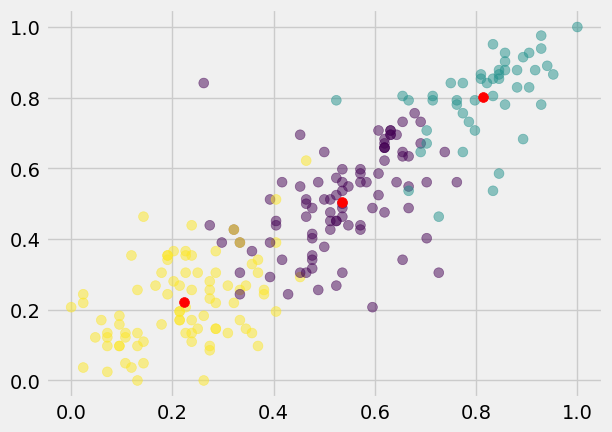

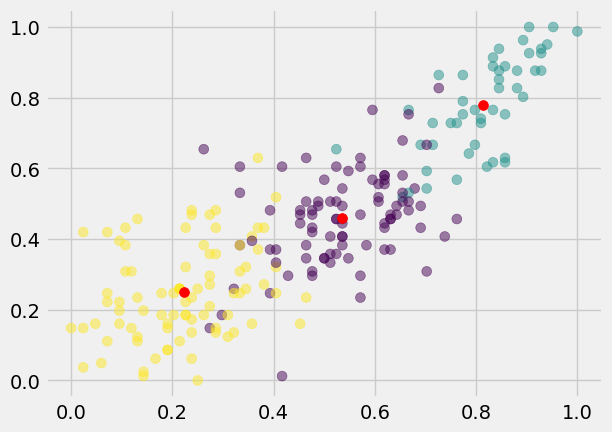

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 34).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['English Language Arts Achievement'], df['Social Studies Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=50)
plt.show()

plt.scatter(df['English Language Arts Achievement'], df['Mathematics Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 2], c='red', s=50)
plt.show()

plt.scatter(df['English Language Arts Achievement'], df['Science Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 3], c='red', s=50)
plt.show()

[[0.53545264 0.63736264 0.50589654 0.45950346]
 [0.81433637 0.88454318 0.80150493 0.77935382]
 [0.22286822 0.35943912 0.22078843 0.25021533]]


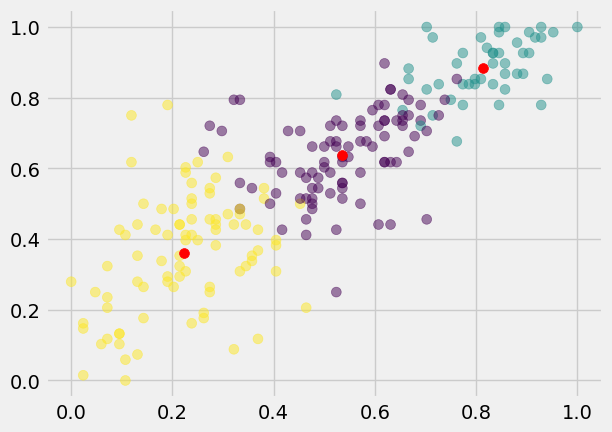

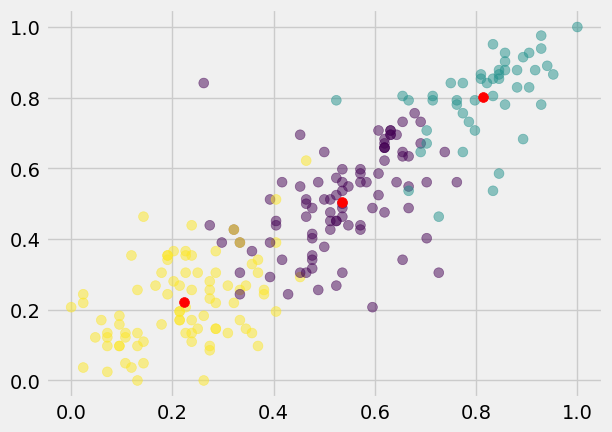

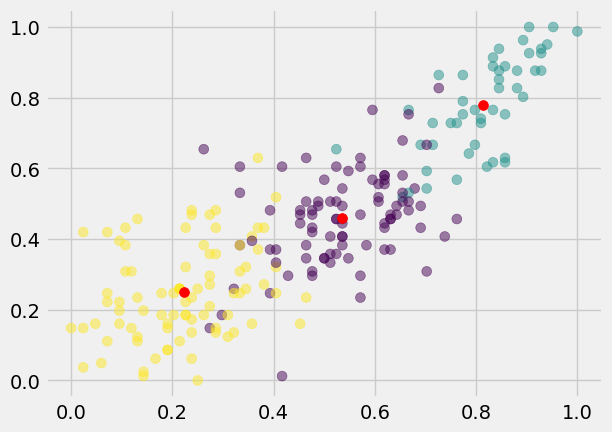

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, n_init = 8, algorithm = 'elkan', random_state = 34).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['English Language Arts Achievement'], df['Social Studies Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=50)
plt.show()

plt.scatter(df['English Language Arts Achievement'], df['Mathematics Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 2], c='red', s=50)
plt.show()

plt.scatter(df['English Language Arts Achievement'], df['Science Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 3], c='red', s=50)
plt.show()

# Elbow method to determine number of clusters
## Package called kneed does this automatically

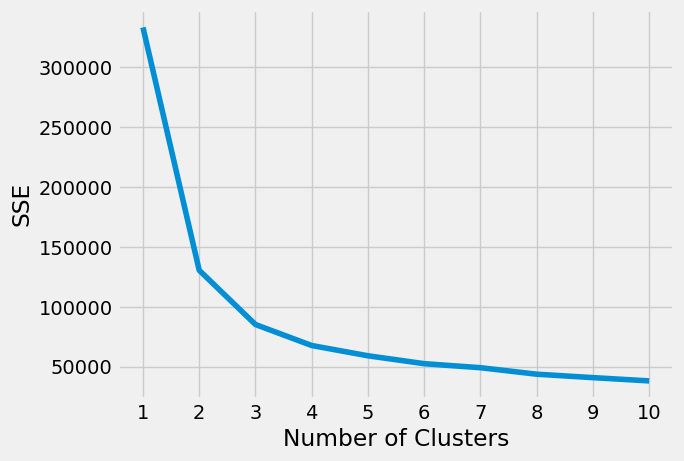

In [21]:
kmeans_kwargs = {
    "init" : "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 28,
}

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(df)
     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Silhouette method for determining number of clusters

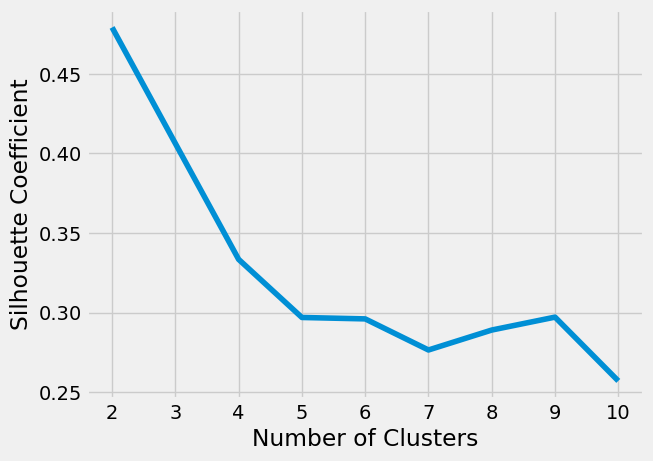

In [22]:
from sklearn.metrics import silhouette_score

# List to hold silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(df)
   score = silhouette_score(df, kmeans.labels_)
   silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

pd.set_option("display.precision", 3)

elaa = df['English Language Arts Achievement'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
# print(min_max_scaler.fit_transform(elaa.reshape(-1, 1)))
selaa = min_max_scaler.fit_transform(elaa.reshape(-1, 1))
sca = df['Social Studies Achievement'].values.astype(float)
ssca = min_max_scaler.fit_transform(sca.reshape(-1, 1))
ma = df['Mathematics Achievement'].values.astype(float)
sma = min_max_scaler.fit_transform(ma.reshape(-1, 1))
sa = df['Science Achievement'].values.astype(float)
ssa = min_max_scaler.fit_transform(sa.reshape(-1, 1))
norm_tuples = list(zip(selaa, ssca, sma, ssa))
df = pd.DataFrame(norm_tuples, 
                  columns = ['English Language Arts Achievement', 'Social Studies Achievement', 
                  'Mathematics Achievement', 'Science Achievement'])
df
# df = df.apply(pd.to_numeric, errors='ignore')
# df.dtypes

,English Language Arts Achievement,Social Studies Achievement,Mathematics Achievement,Science Achievement
0,[0.8333333333333333],[0.926470588235294],[0.853658536585366],[0.617283950617284]
1,[0.7023809523809523],[0.4558823529411765],[0.5609756097560976],[0.30864197530864196]
2,[0.6071428571428571],[0.7205882352941176],[0.5853658536585367],[0.5061728395061729]
3,[0.19047619047619047],[0.2941176470588235],[0.24390243902439024],[0.16049382716049382]
4,[0.6190476190476191],[0.7352941176470588],[0.6585365853658536],[0.5555555555555556]
...,...,...,...,...
219,[0.3928571428571428],[0.5],[0.39024390243902435],[0.48148148148148145]
220,[0.45238095238095233],[0.5147058823529411],[0.5487804878048781],[0.48148148148148145]
221,[0.45238095238095233],[0.5882352941176471],[0.3048780487804878],[0.46913580246913583]
222,[0.10714285714285715],[0.4117647058823529],[0.04878048780487804],[0.30864197530864196]


[[0.53545264 0.63736264 0.50589654 0.45950346]
 [0.81433637 0.88454318 0.80150493 0.77935382]
 [0.22286822 0.35943912 0.22078843 0.25021533]]


/Users/jrmotta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


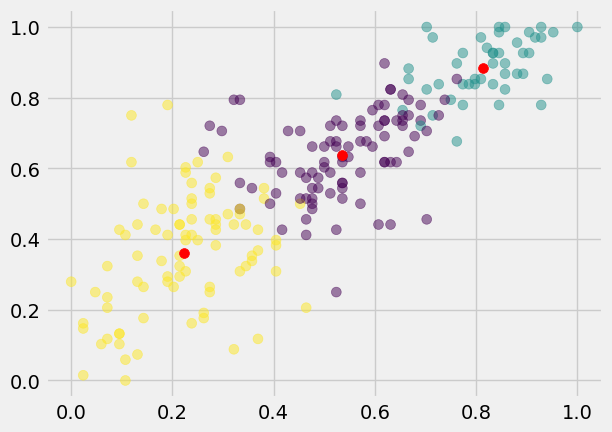

In [24]:
kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['English Language Arts Achievement'], df['Social Studies Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=50)
plt.show()
